<a href="https://colab.research.google.com/github/ektamistry/Machine-Learning/blob/main/BayesianNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD

In [ ]:
alarm_model = BayesianNetwork([("Burglary", "Alarm"),("Earthquake", "Alarm"),("Alarm", "JohnCalls"),("Alarm", "MaryCalls")])

In [ ]:
cpd_burglary = TabularCPD(variable="Burglary", variable_card=2, values=[[0.999], [0.001]])

In [ ]:
cpd_earthquake = TabularCPD(variable="Earthquake", variable_card=2, values=[[0.998], [0.002]])

In [ ]:
cpd_johncalls = TabularCPD(variable="JohnCalls",variable_card=2,values=[[0.95, 0.1], [0.05, 0.9]],evidence=["Alarm"],evidence_card=[2])

In [ ]:
cpd_marycalls = TabularCPD(variable="MaryCalls",variable_card=2,values=[[0.1, 0.7], [0.9, 0.3]],evidence=["Alarm"],evidence_card=[2])

In [ ]:
cpd_alarm = TabularCPD(variable="Alarm",variable_card=2,values=[[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],evidence=["Burglary", "Earthquake"],evidence_card=[2, 2],)

In [ ]:
alarm_model.add_cpds(cpd_burglary,cpd_earthquake,cpd_alarm,cpd_johncalls,cpd_marycalls)

In [ ]:
print('Probability distribution, P(Burglary)')
print(cpd_burglary)
print()
print('Probability distribution, P(Earthquake)')
print(cpd_earthquake)
print()
print('Joint probability distribution, P(Alarm | Burglary, Earthquake)')
print(cpd_alarm)
print()
print('Joint probability distribution, P(JohnCalls | Alarm)')
print(cpd_johncalls)
print()
print('Joint probability distribution, P(MaryCalls | Alarm)')
print(cpd_marycalls)
print()

Probability distribution, P(Burglary)
+-------------+-------+
| Burglary(0) | 0.999 |
+-------------+-------+
| Burglary(1) | 0.001 |
+-------------+-------+

Probability distribution, P(Earthquake)
+---------------+-------+
| Earthquake(0) | 0.998 |
+---------------+-------+
| Earthquake(1) | 0.002 |
+---------------+-------+

Joint probability distribution, P(Alarm | Burglary, Earthquake)
+------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(0)   | Burglary(0)   | Burglary(1)   | Burglary(1)   |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.999         | 0.71          | 0.06          | 0.05          |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.001         | 0.29          | 0.94  

In [ ]:
import networkx as nx

In [ ]:
nx_graph = nx.DiGraph(alarm_model.edges())

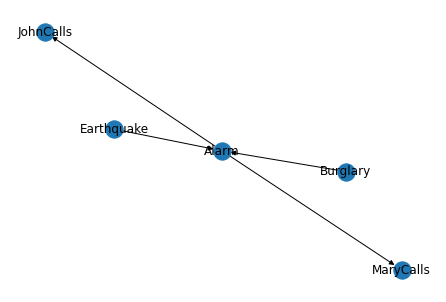

In [ ]:
nx.draw(nx_graph,with_labels = True)

Rejection sampling

In [ ]:
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State
infer = BayesianModelSampling(alarm_model)
evidence = [State(var='Alarm', state=1)]
infer.rejection_sample(evidence=evidence, size=2)

  0%|          | 0/2 [00:00<?, ?it/s]

,Burglary,Alarm,Earthquake,JohnCalls,MaryCalls
0,1,1,0,1,1
1,0,1,0,1,0


In [ ]:
evidence = [State(var='Burglary', state=1)]
infer.rejection_sample(evidence=evidence, size=2)

  0%|          | 0/2 [00:00<?, ?it/s]

,Burglary,Alarm,Earthquake,JohnCalls,MaryCalls
0,1,1,0,1,1
1,1,1,0,1,0


Gibbs Sampling

In [ ]:
from pgmpy.sampling import GibbsSampling
gibbs_chain = GibbsSampling(alarm_model)
gibbs_chain.sample(size=3)

  0%|          | 0/2 [00:00<?, ?it/s]

,Burglary,Alarm,Earthquake,JohnCalls,MaryCalls
0,1,1,1,0,0
1,0,1,0,1,0
2,1,1,0,1,1


In [ ]:
gibbs_chain = GibbsSampling(alarm_model)
gibbs_chain.sample(size=15)

  0%|          | 0/14 [00:00<?, ?it/s]

,Burglary,Alarm,Earthquake,JohnCalls,MaryCalls
0,1,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1
6,0,0,0,0,0
7,0,0,0,0,1
8,0,0,0,1,1
9,0,0,0,0,1
